In [1]:
import tensorflow as tf 
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
tf.__version__

'2.1.0'

In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist

In [4]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [6]:
train_images.shape

(60000, 28, 28)

In [7]:
train_labels.shape

(60000,)

In [8]:
test_images.shape

(10000, 28, 28)

In [9]:
test_labels.shape

(10000,)

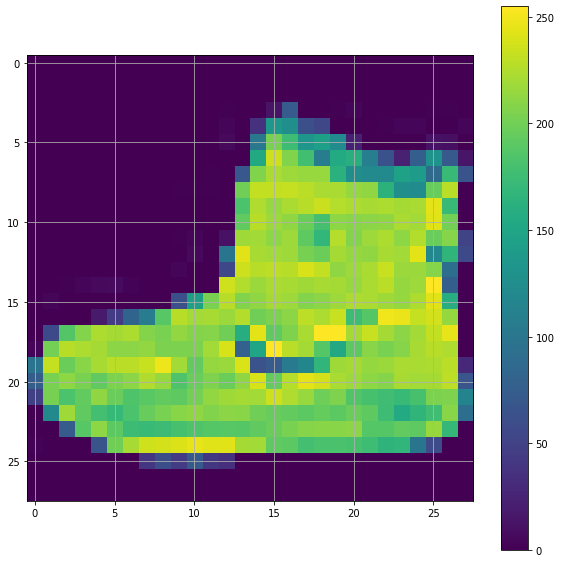

In [19]:
plt.figure(figsize=(10,10))
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(True)
plt.show()

In [17]:
train_images[0][14]

array([  0,   0,   1,   4,   6,   7,   2,   0,   0,   0,   0,   0, 237,
       226, 217, 223, 222, 219, 222, 221, 216, 223, 229, 215, 218, 255,
        77,   0], dtype=uint8)

In [20]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [21]:
type(train_images)

numpy.ndarray

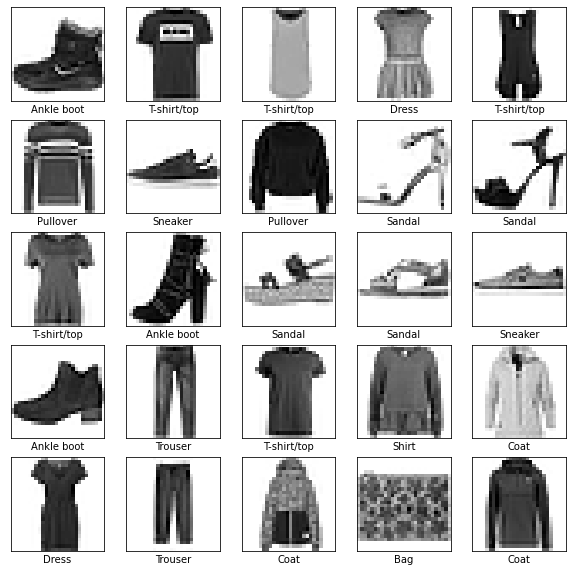

In [22]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(True)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [24]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [25]:
type(model)

tensorflow.python.keras.engine.sequential.Sequential

In [26]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [27]:
model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 69us/sample - loss: 0.5023 - accuracy: 0.8256
Epoch 2/10
60000/60000 [==============================] - 3s 52us/sample - loss: 0.3803 - accuracy: 0.8633
Epoch 3/10
60000/60000 [==============================] - 3s 52us/sample - loss: 0.3399 - accuracy: 0.8755
Epoch 4/10
60000/60000 [==============================] - 3s 52us/sample - loss: 0.3162 - accuracy: 0.8834
Epoch 5/10
60000/60000 [==============================] - 3s 52us/sample - loss: 0.2975 - accuracy: 0.8915
Epoch 6/10
60000/60000 [==============================] - 3s 52us/sample - loss: 0.2832 - accuracy: 0.8951
Epoch 7/10
60000/60000 [==============================] - 3s 52us/sample - loss: 0.2716 - accuracy: 0.8999
Epoch 8/10
60000/60000 [==============================] - 3s 52us/sample - loss: 0.2614 - accuracy: 0.9031
Epoch 9/10
60000/60000 [==============================] - 3s 52us/sample - loss: 0.2512 - accuracy: 0.9061
Epoch 10/10
60

In [28]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

10000/10000 - 0s - loss: 0.3431 - accuracy: 0.8847


In [29]:
test_acc

0.8847

In [30]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [31]:
predictions = probability_model.predict(test_images)

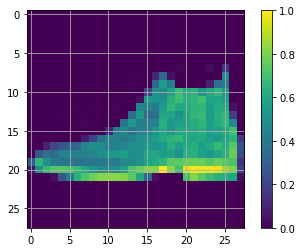

In [32]:
plt.figure()
plt.imshow(test_images[0])
plt.colorbar()
plt.grid(True)
plt.show()

In [33]:
class_names[np.argmax(predictions[0])]

'Ankle boot'

In [35]:
predictions[0]

array([3.7723247e-08, 2.1576729e-09, 1.6125349e-06, 2.4459504e-07,
       4.9243636e-09, 5.7054544e-03, 2.1593860e-07, 3.8559705e-03,
       6.7024345e-08, 9.9043638e-01], dtype=float32)

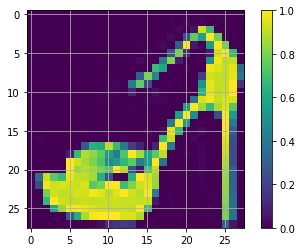

In [50]:
plt.figure()
plt.imshow(test_images[384])
plt.colorbar()
plt.grid(True)
plt.show()

In [51]:
class_names[np.argmax(predictions[384])]

'Sandal'

In [52]:
model.save('fashion_seq_model.h5')